# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [2]:
data = pd.read_csv('Example-bank-data.csv')
data.head()

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no


We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [3]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})
data.head()

,Unnamed: 0,duration,y
0,0,117,0
1,1,274,1
2,2,167,0
3,3,686,1
4,4,157,0


In [4]:
data.describe()

,Unnamed: 0,duration,y
count,518.000000,518.000000,518.000000
mean,258.500000,382.177606,0.500000
std,149.677988,344.295990,0.500483
min,0.000000,9.000000,0.000000
25%,129.250000,155.000000,0.000000
50%,258.500000,266.500000,0.500000
75%,387.750000,482.750000,1.000000
max,517.000000,2653.000000,1.000000


### Declare the dependent and independent variables

In [5]:
y = data['y']
x = data['duration']

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [6]:
x_with_const = sm.add_constant(x)
results = sm.Logit(y,x_with_const).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Aug 2019   Pseudo R-squ.:                  0.2121
Time:                        17:24:41   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

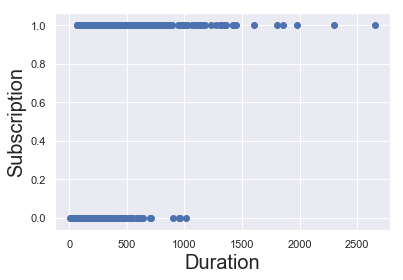

In [7]:
plt.scatter(x,y)
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()